In [166]:
import numpy as np
import matplotlib.pyplot as plt
from evoscape.landscapes import Landscape
from evoscape.modules import *
import evoscape.landscape_visuals as vis

pi = np.pi

In [167]:
from matplotlib import style
style.use('default')
plt.rcParams.update({'figure.dpi': 200})
plt.rcParams.update({'font.size': 15})

In [121]:
L = 1.5
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

In [122]:
def x_y_dot(r, theta, r_dot, theta_dot, pars):
    x_dot = r_dot(r, theta, pars) * np.cos(theta) - r * np.sin(theta) * theta_dot(r, theta, pars)
    y_dot = r_dot(r, theta, pars) * np.sin(theta) + r * np.cos(theta) * theta_dot(r, theta, pars)
    return x_dot, y_dot


def r_dot_RIC(r, theta, *pars):
    return r*(1 - r**2)

def theta_dot_RIC(r, theta, *pars):
    return 1.

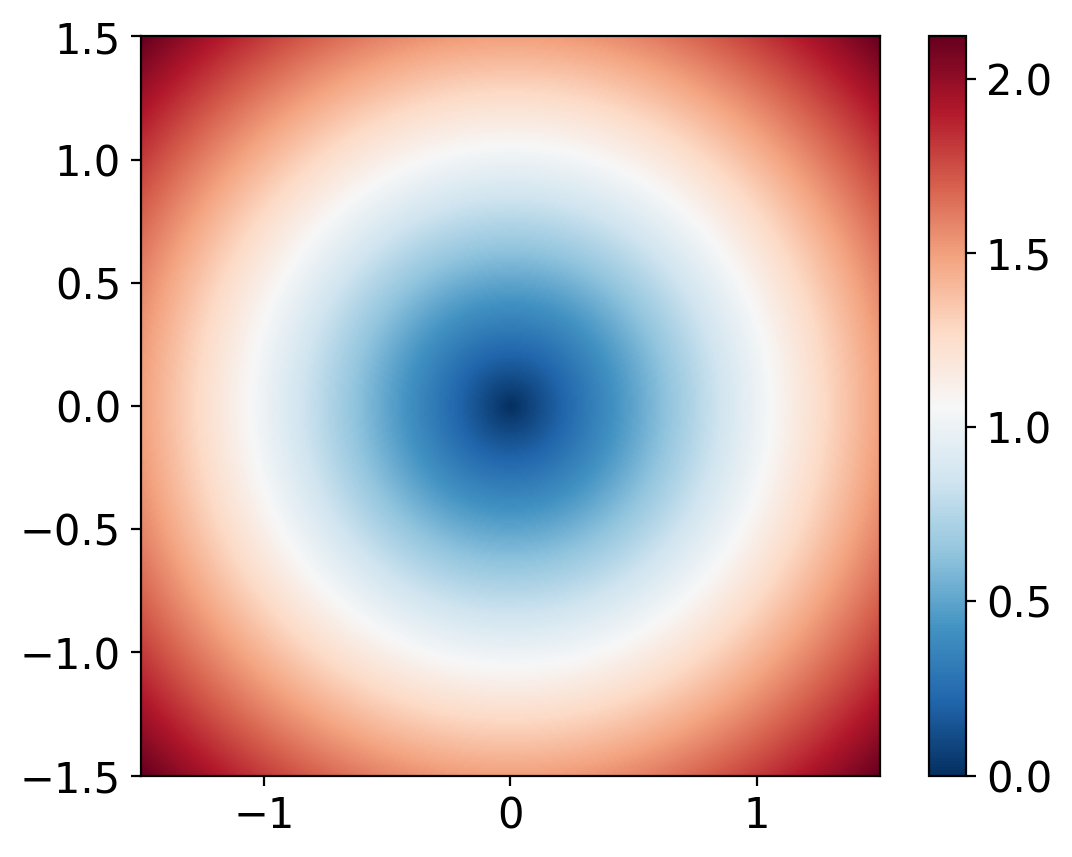

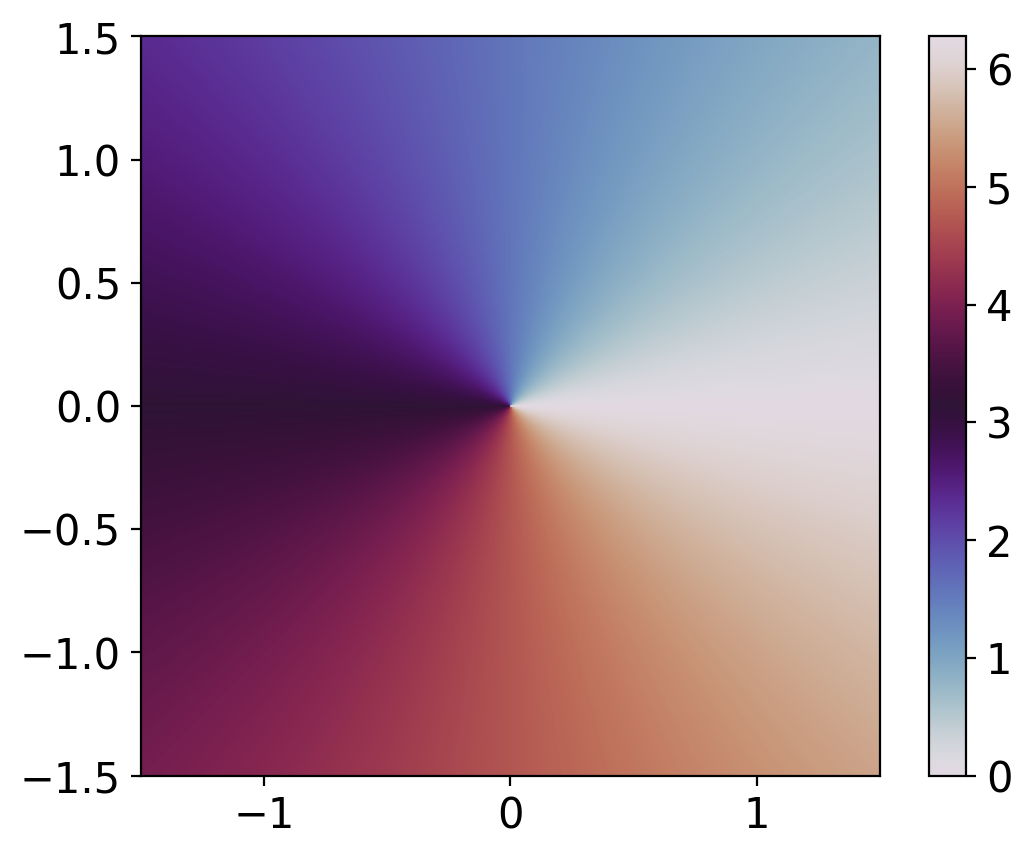

In [123]:

rr = np.sqrt(xx**2 + yy**2)
theta = (np.arctan2(yy, xx) + 2*np.pi)  % (2*np.pi)

plt.imshow(rr, cmap='RdBu_r', extent=[-L, L, -L, L], origin='lower')
plt.colorbar()
plt.show()

plt.imshow(theta, cmap='twilight', extent=[-L, L, -L, L], origin='lower')
plt.colorbar()
plt.show()

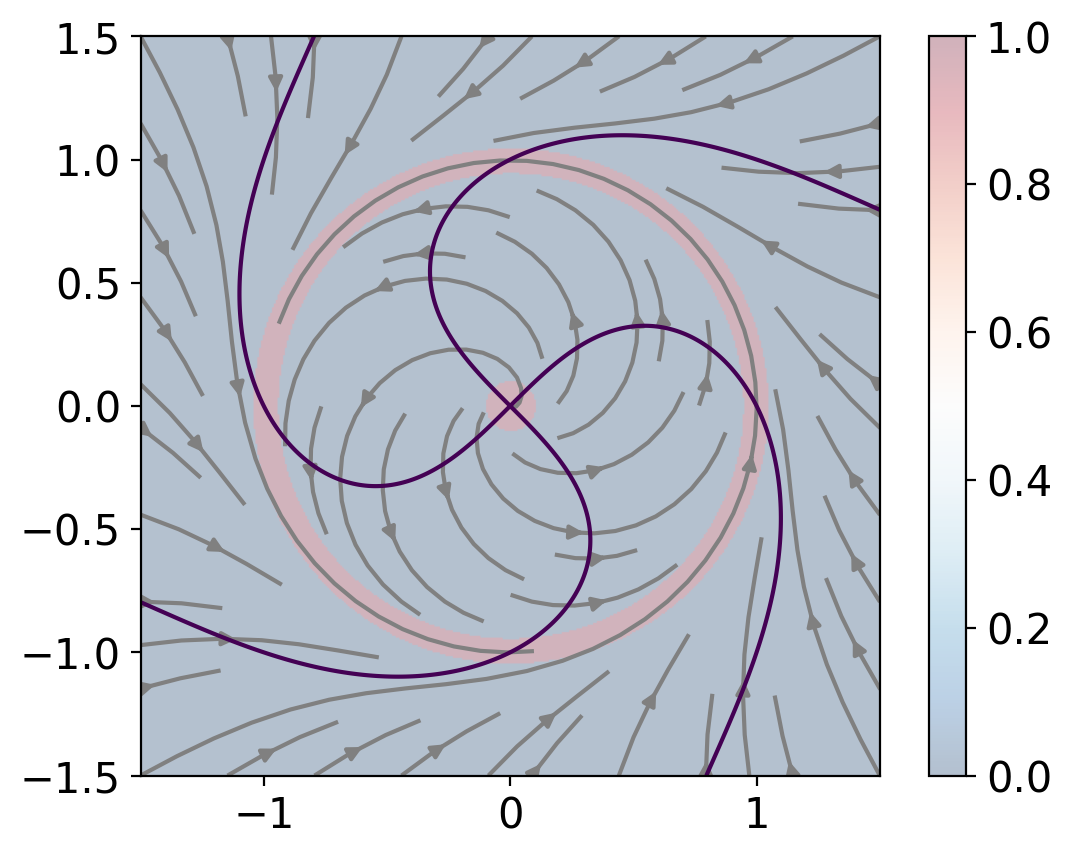

In [124]:
pars = {}

x_dot, y_dot = x_y_dot(rr, theta, r_dot_RIC, theta_dot_RIC, pars)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.6)
plt.contour(xx, yy, x_dot, levels=(0,))
plt.contour(xx, yy, y_dot, levels=(0,))
plt.imshow(np.abs(r_dot_RIC(rr, theta))<1e-1, cmap='RdBu_r', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.colorbar()
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_60753/3235593766.py:5: RuntimeWarning: invalid value encountered in divide
  return  -1.* np.sin(theta) / r


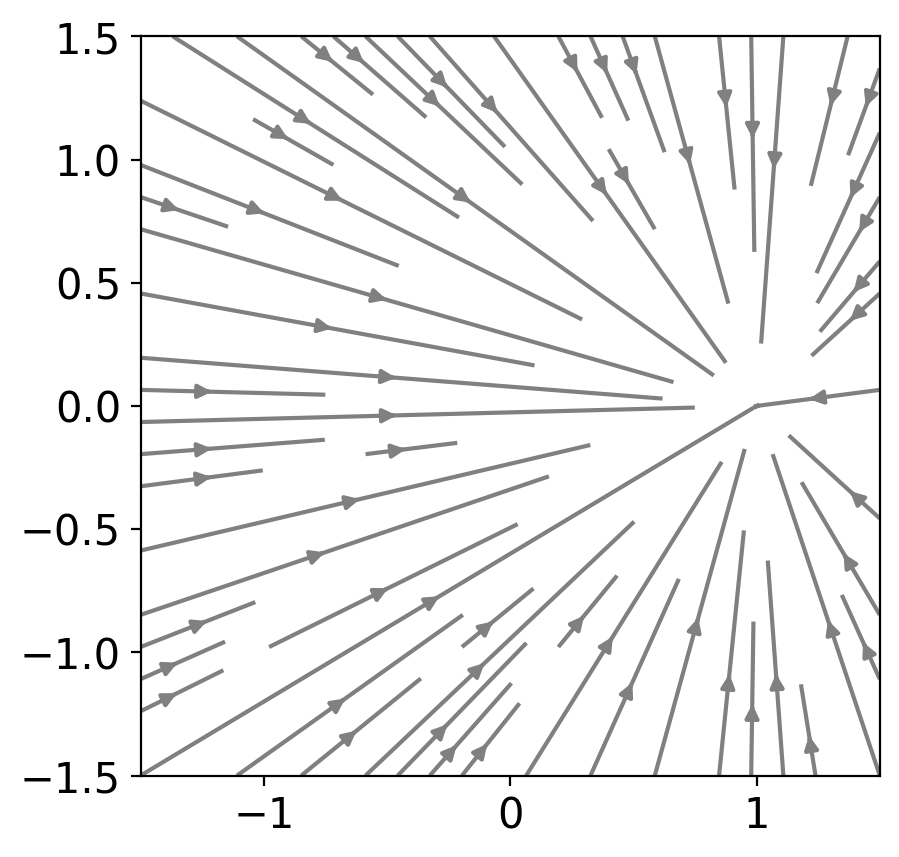

In [125]:
def r_dot_fp(r, theta, *pars):
    return -r + 1. *np.cos(theta)

def theta_dot_fp(r, theta, *pars):
    return  -1.* np.sin(theta) / r

plt.streamplot(xx, yy, *x_y_dot(rr, theta, r_dot_fp, theta_dot_fp, pars), color='grey', density=.8)
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

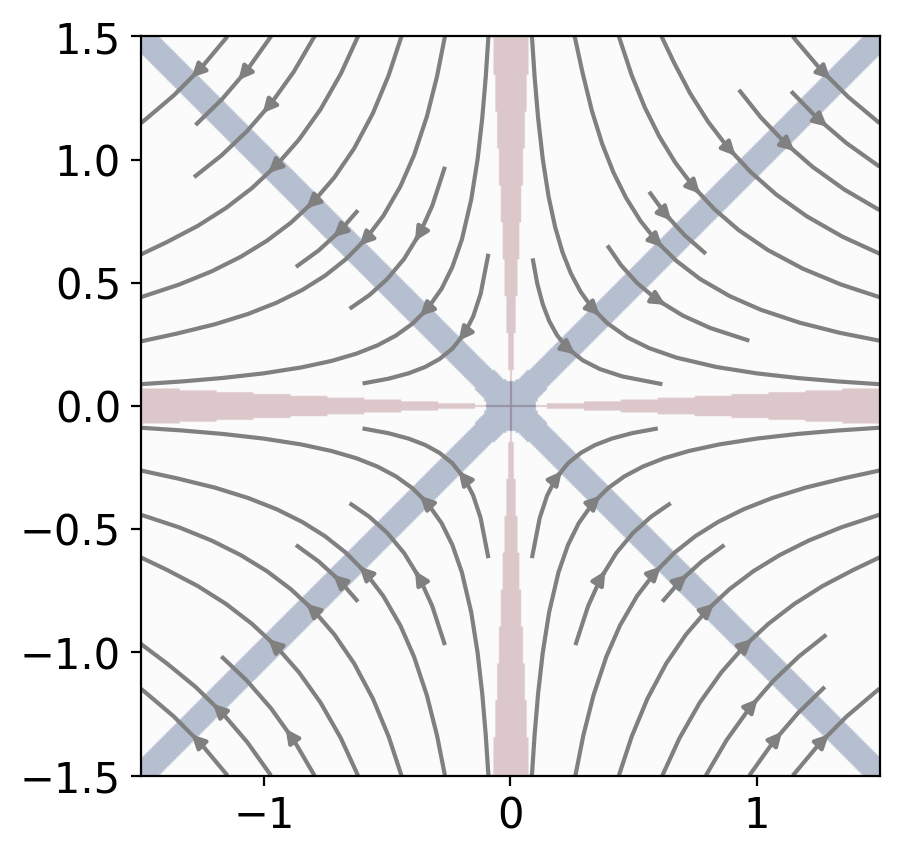

In [126]:
def r_dot_saddle(r, theta, *pars):
    return r*np.cos(2*theta)

def theta_dot_saddle(r, theta, *pars):
    return  -np.sin(2*theta)

plt.streamplot(xx, yy, *x_y_dot(rr, theta, r_dot_saddle, theta_dot_saddle, pars), color='grey', density=.6)
plt.imshow(np.abs(theta_dot_saddle(rr, theta))<1e-1, cmap='Reds', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
plt.imshow(np.abs(r_dot_saddle(rr, theta))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)

ax=plt.gca()
ax.set_aspect('equal')
plt.show()

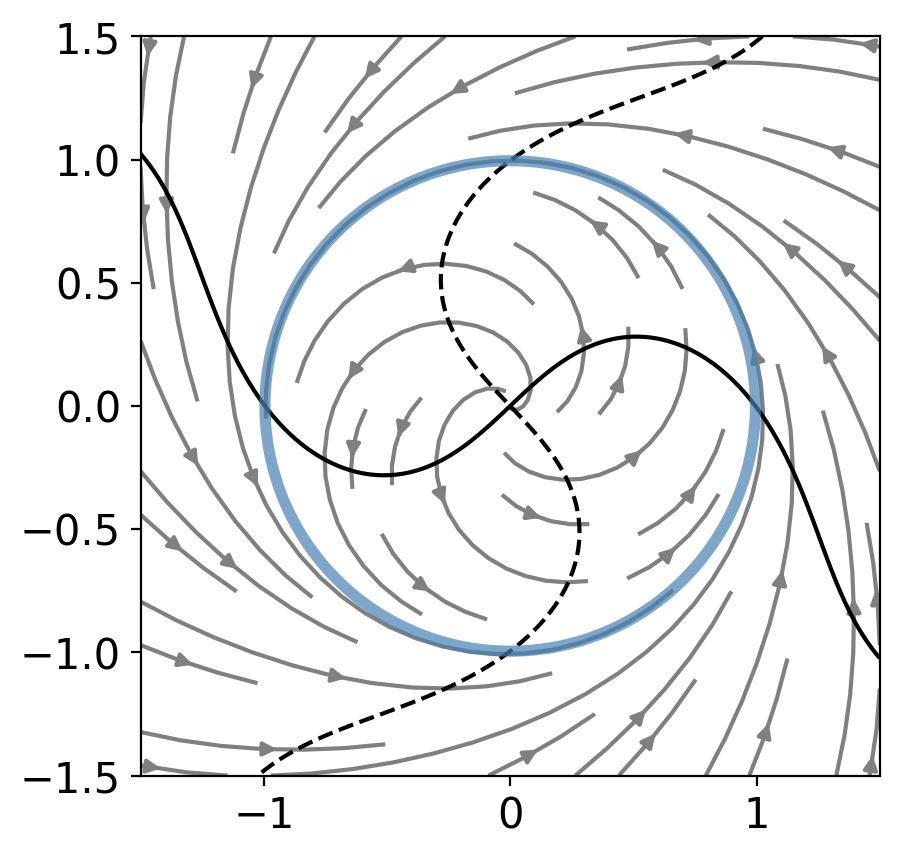

In [127]:

def r_dot_cycle(r, theta, pars):
    a1 = pars['a1']
    a2 = pars['a2']
    s1 = pars['s1']
    s2 = pars['s2']
    return -a1*r *np.exp(-r**2/2/s1**2) + a2*r*np.exp(-r**2/2/s2**2)

def theta_dot_cycle(r, theta, pars):
    a3 = pars['a3']
    s3 = pars['s3']
    return a3*np.exp(-r**2/2/s3**2)

pars = {
    'a1': 3.,
    'a2': 3.95,
    'a3': 1.,
    's1': 1.5,
    's2': 1.,
    's3': 100.,
}

x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_cycle, pars)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.6)
plt.contour(xx, yy, x_dot, levels=(0,), colors='k')
plt.contour(xx, yy, y_dot, levels=(0,), colors='k', linestyles='--')
plt.contour(xx, yy, r_dot_cycle(rr, theta, pars), levels=(0,), colors='steelblue', linewidths=4, alpha=0.7)
plt.contour(xx, yy, theta_dot_cycle(rr, theta, pars), levels=(0,), colors='indianred', linewidths=4, alpha=0.7)
# plt.imshow(np.abs(r_dot_cycle(rr, theta, pars))<1e-1, cmap='Blues', origin='lower', extent=[-L, L, -L, L], alpha=0.3)
# plt.colorbar()
# plt.vlines(1, -1.5, 1.5)
# plt.xticks()
ax=plt.gca()
ax.set_aspect('equal')
plt.show()

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_60753/2777475814.py:16: RuntimeWarning: invalid value encountered in divide
  return theta_dot_cycle(r, theta, pars) - a4*x0*np.sin(theta)/r * np.exp(-r0**2/2./s4**2)


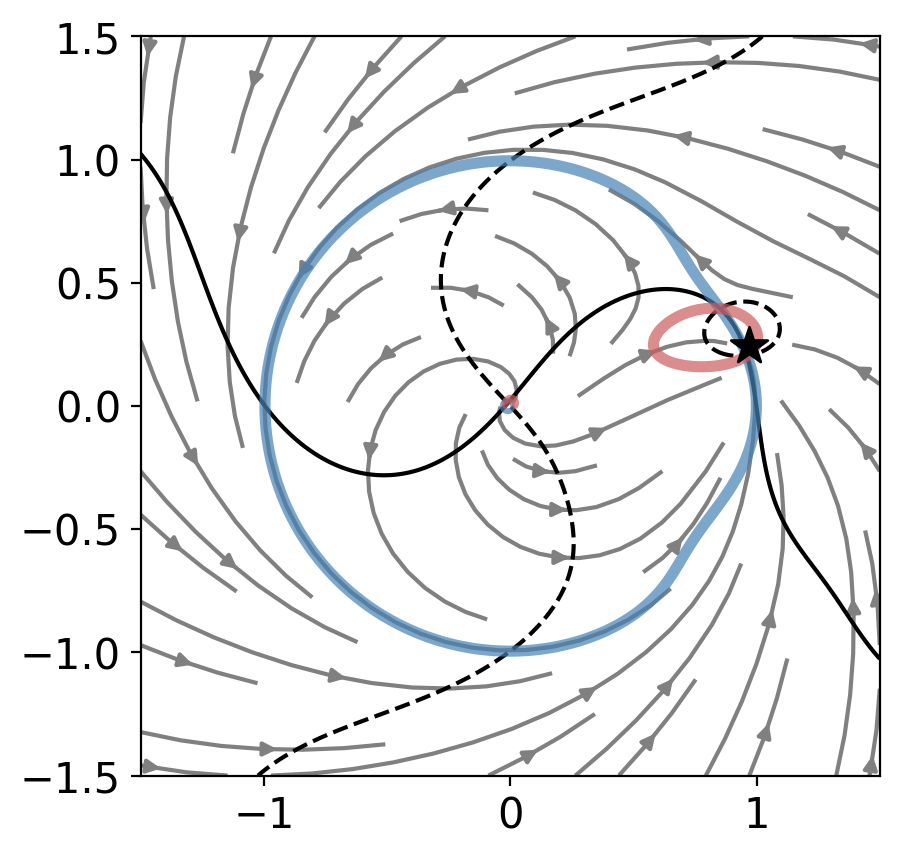

In [149]:
def r_dot_snic(r, theta, pars):
    r_cycle = r_dot_cycle(r, theta, pars)
    a4 = pars['a4']
    s4 = pars['s4']
    x0 = pars['x0']
    rr02 = r**2 + x0**2 - 2*r*x0*np.cos(theta)
    return r_cycle + a4 * (x0*np.cos(theta) - r)* np.exp(-rr02/2/s4**2)

def theta_dot_snic(r, theta, pars):
    a4 = pars['a4']
    s4 = pars['s4']
    x0 = pars['x0']
    x = r*np.cos(theta)
    y = r*np.sin(theta)
    r0 = np.sqrt((x-x0)**2 + y**2)
    return theta_dot_cycle(r, theta, pars) - a4*x0*np.sin(theta)/r * np.exp(-r0**2/2./s4**2)


pars = {
    'a1': 3.,
    'a2': 3.95,
    'a3': 1.,
    's1': 1.5,
    's2': 1.,
    's3': 100.,

    'a4': 6.,
    's4': 0.3,
    'x0': 1.,
}

x_dot, y_dot = x_y_dot(rr, theta, r_dot_snic, theta_dot_snic, pars)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.6)
plt.contour(xx, yy, x_dot, levels=(0,), colors='k')
plt.contour(xx, yy, y_dot, levels=(0,), colors='k', linestyles='--')
plt.contour(xx, yy, r_dot_snic(rr, theta, pars), levels=(0,), colors='steelblue', linewidths=4, alpha=0.7)
plt.contour(xx, yy, theta_dot_snic(rr, theta, pars), levels=(0,), colors='indianred', linewidths=4, alpha=0.7)

# plt.vlines(1, -1.5, 1.5)
ax=plt.gca()
ax.set_aspect('equal')
theta_dot = np.sqrt(2/3)*pars['s4']
plt.scatter(np.cos(theta_dot), np.sin(theta_dot), c='k', marker='*', s=190, alpha=1., zorder=100)
plt.show()




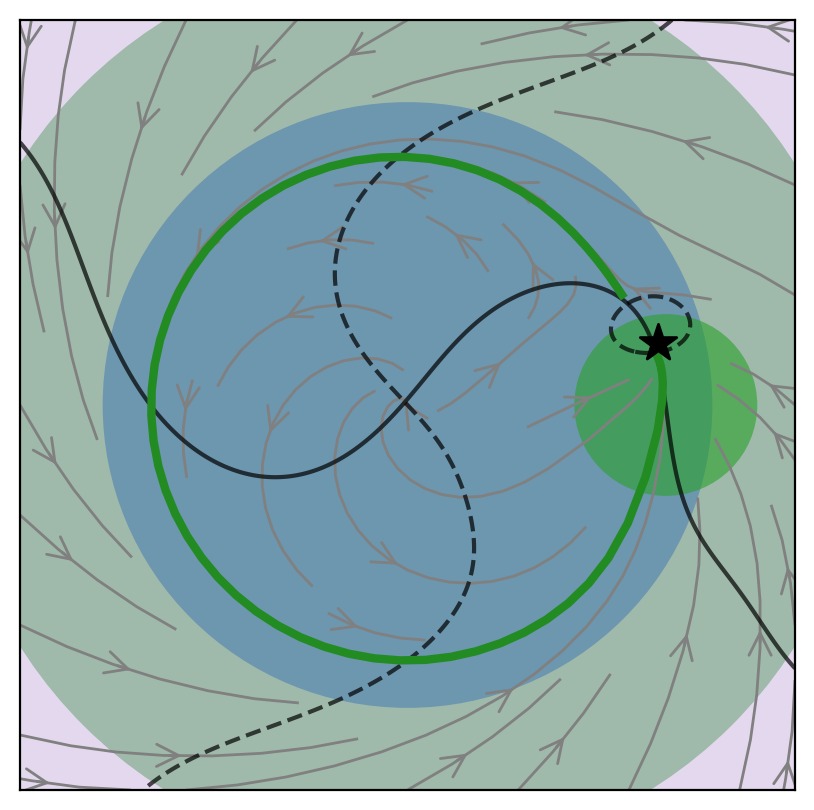

In [177]:
M1 = Node(0., 0., 3., 1.5)
M2 = UnstableNode(0., 0., 3.95, 1.)
M3 = Center(0., 0., 1., 100.)
M4 = Node(1., 0., 6., 0.3)
landscape = Landscape([M1, M2, M3, M4], A0 = 0.)

fig = vis.visualize_landscape_t(landscape, xx, yy, 0., traj_times = (0, 40, 401), traj_init_cond =(0.83, 0.43))
plt.scatter(np.cos(theta_dot), np.sin(theta_dot), c='k', marker='*', s=190, alpha=1., zorder=100)


/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_60753/2777475814.py:16: RuntimeWarning: invalid value encountered in divide
  return theta_dot_cycle(r, theta, pars) - a4*x0*np.sin(theta)/r * np.exp(-r0**2/2./s4**2)


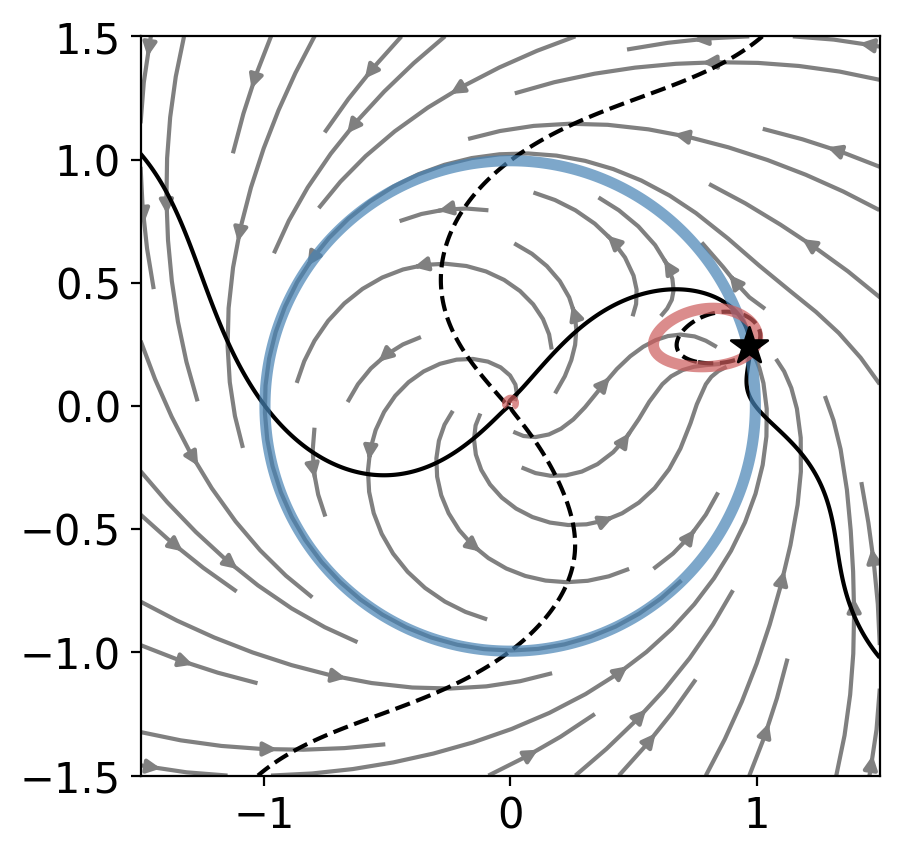

In [150]:

pars = {
    'a1': 3.,
    'a2': 3.95,
    'a3': 1.,
    's1': 1.5,
    's2': 1.,
    's3': 100.,

    'a4': 6.,
    's4': 0.3,
    'x0': 1.,
}

x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_snic, pars)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.6)
plt.contour(xx, yy, x_dot, levels=(0,), colors='k')
plt.contour(xx, yy, y_dot, levels=(0,), colors='k', linestyles='--')
plt.contour(xx, yy, r_dot_cycle(rr, theta, pars), levels=(0,), colors='steelblue', linewidths=4, alpha=0.7)
plt.contour(xx, yy, theta_dot_snic(rr, theta, pars), levels=(0,), colors='indianred', linewidths=4, alpha=0.7)
plt.scatter(np.cos(theta_dot), np.sin(theta_dot), c='k', marker='*', s=190, alpha=1., zorder=100)

# plt.vlines(1, -1.5, 1.5)
ax=plt.gca()
ax.set_aspect('equal')
plt.show()




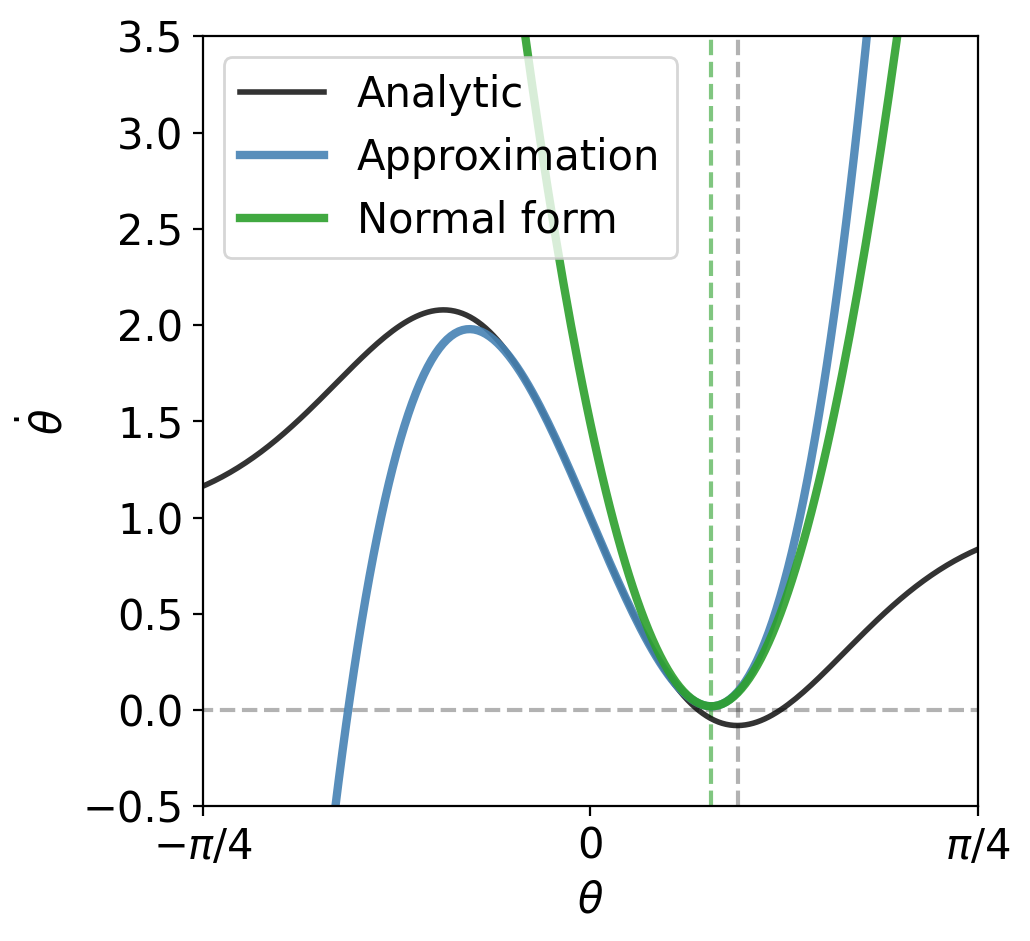

In [269]:

def theta_dot_snic_approx(r, theta, pars):
    a4 = pars['a4']
    s4 = pars['s4']
    x0 = pars['x0']
    return theta_dot_cycle(r, theta, pars) - a4*theta*(1 - theta**2/2./s4**2)

def theta_dot_normal_form(r, theta, pars):
    a3 = pars['a3']
    a4 = pars['a4']
    s4 = pars['s4']
    theta_star = np.sqrt(2./3.)*s4
    # print(theta_star*a4)
    theta_tilde = (theta - theta_star)/theta_star
    mu = a3/a4/theta_star - 2./3.
    # return a4*theta_star * (mu + theta_tilde**2)
    return  (mu + theta_tilde**2)*a4*theta_star



pars = {
    'a1': 3.,
    'a2': 3.95,
    'a3': 1.,
    's1': 1.5,
    's2': 1.,
    's3': 100.,

    'a4': 6.,
    's4': 0.3,
    'x0': 1.,
}

plt.figure(figsize = (5,5))
theta_star = np.sqrt(2./3.)*pars['s4']
a4 = pars['a4']
thetas = np.linspace(-pi/2, pi/2, 401)
plt.hlines(0, -pi/2, pi/2, linestyles='--', color='k', alpha=0.3)
plt.vlines(theta_star, -0.5, 3.5, linestyles='--', color='tab:green', alpha=0.6)
plt.vlines(thetas[np.argmin(theta_dot_snic(1., thetas, pars))], -0.5, 3.5, linestyles='--', color='k', alpha=0.3)
plt.plot(thetas, theta_dot_snic(1., thetas, pars), 'k', lw=2, alpha=0.8, label='Analytic')
plt.plot(thetas, theta_dot_snic_approx(1., thetas, pars), 'steelblue', lw=3, alpha=0.9, label='Approximation')
plt.plot(thetas, theta_dot_normal_form(1., thetas, pars), 'tab:green', lw=3, alpha=0.9, label='Normal form')


plt.ylim((-0.5, 3.5))
plt.xlim((-pi/4, pi/4))
plt.legend(loc='best')
plt.xticks([-pi/4, 0, pi/4], labels=[r'$-\pi/4$', '0', r'$\pi/4$'])
plt.xlabel('$\\theta$')
plt.ylabel('$\dot{\\theta}$')
plt.show()

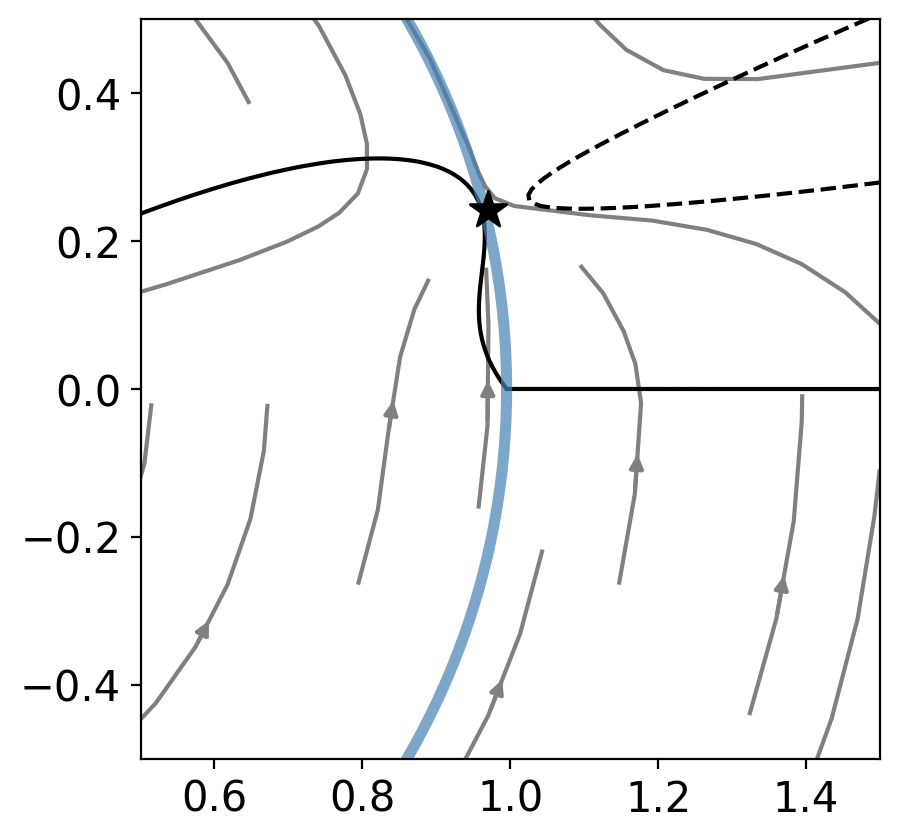

In [155]:


pars = {
    'a1': 3.,
    'a2': 3.95,
    'a3': 1.,
    's1': 1.5,
    's2': 1.,
    's3': 100.,

    'a4': 6.,
    's4': 0.3,
    'x0': 1.,
}

x_dot, y_dot = x_y_dot(rr, theta, r_dot_cycle, theta_dot_snic_approx, pars)
plt.streamplot(xx, yy, x_dot, y_dot, color='grey', density=.6)
plt.contour(xx, yy, x_dot, levels=(0,), colors='k')
plt.contour(xx, yy, y_dot, levels=(0,), colors='k', linestyles='--')
plt.contour(xx, yy, r_dot_cycle(rr, theta, pars), levels=(0,), colors='steelblue', linewidths=4, alpha=0.7)
plt.contour(xx, yy, theta_dot_snic_approx(rr, theta, pars), levels=(0,), colors='indianred', linewidths=4, alpha=0.7)
plt.scatter(np.cos(theta_dot), np.sin(theta_dot), c='k', marker='*', s=190, alpha=1., zorder=100)
plt.ylim((-0.5, 0.5))
plt.xlim((0.5, 1.5))
# plt.vlines(1, -1.5, 1.5)
ax=plt.gca()
ax.set_aspect('equal')
plt.show()




## Saddle-node bifurcation

In [219]:
from scipy.optimize import root_scalar

/var/folders/yn/r99j3qy962lg5cwmzc1dpqg40000gn/T/ipykernel_60753/4227508742.py:41: RuntimeWarning: divide by zero encountered in log
  plt.plot(p, np.log(p), label='Log p', c='k', lw=2, alpha=0.8)


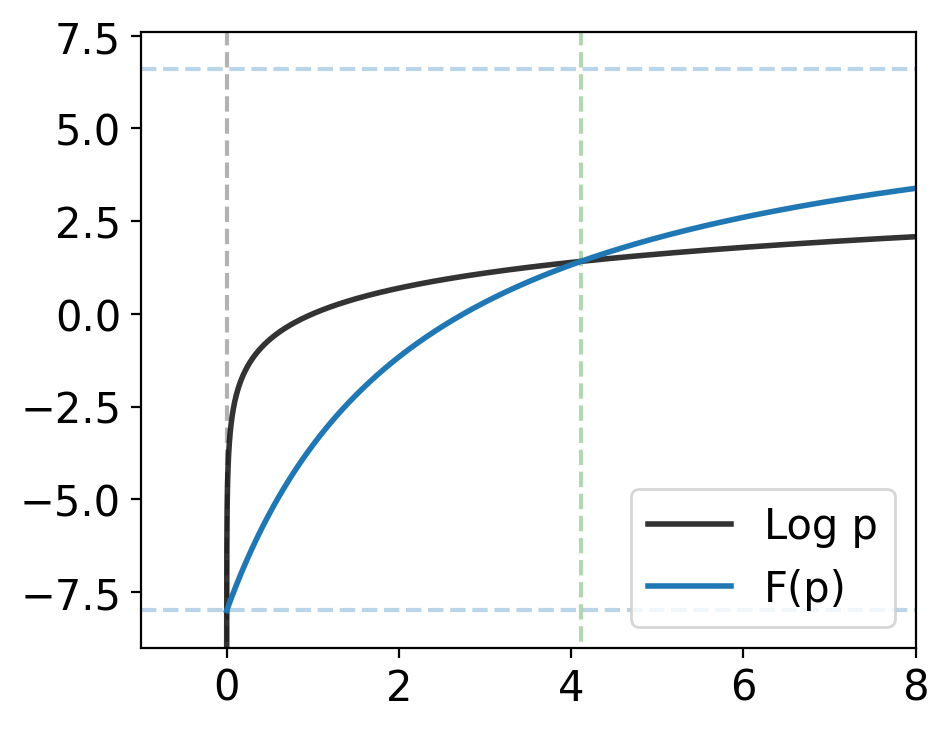

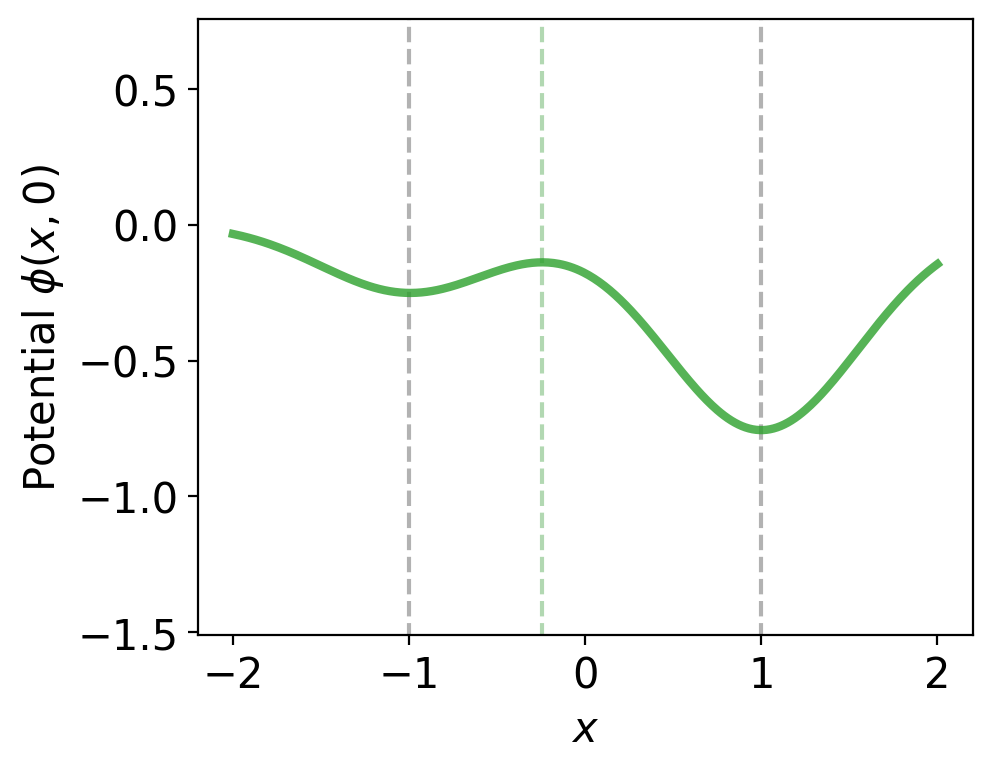

In [294]:
a1 = 1.
a2 = 2.5
l = 1.
s1 = 0.5
s2 = 0.55

kappa = s2/s1
alpha = a2/a1

L = 2.
npoints = 401
q = np.linspace(-L, L, npoints)
xx, yy = np.meshgrid(q, q, indexing='xy')

M1 = Node(-l, 0., a1, s1)
M2 = Node(+l, 0., a2, s2)
landscape = Landscape([M1, M2], A0=0.)

def F(x, alpha, kappa, s2, l):
    return 2. * l**2 / s2**2 * (x**2 - alpha**2 * kappa**2)/(x + alpha)**2

def resid(x):
    if x <= 0:
        return np.inf
    return np.log(x) - F(x, alpha, kappa, s2, l)

roots = []
for x0 in np.linspace(0.01, 2, 10):
    roots.append(root_scalar(resid, x0=1.5, method='secant', xtol=1e-8).root)
roots = np.unique(roots)


plt.figure(figsize = (5,4))
for root in roots:
    plt.vlines(root, -100, 100, linestyles='--', color='g', alpha=0.3)
plt.vlines(0, -100, 100, linestyles='--', color='k', alpha=0.3)

plt.hlines(-2*l**2/s1**2, -1, 11, linestyles='--', color='tab:blue', alpha=0.3)
plt.hlines(2*l**2/s2**2, -1, 11, linestyles='--', color='tab:blue', alpha=0.3)
p = np.linspace(0, 10, 100001)
plt.plot(p, np.log(p), label='Log p', c='k', lw=2, alpha=0.8)
plt.plot(p, F(p, alpha, kappa, s2, l), label = 'F(p)', lw=2)
plt.ylim((-2*l**2/s1**2-1, 2*l**2/s2**2+1))
plt.xlim((-1., 8))
plt.legend(loc='lower right')
plt.show()

plt.figure(figsize = (5,4))
(dX, dY), pot, rot = landscape(0., (xx, yy), return_potentials=True)
for root in roots:
    xloc = (alpha - root)/(alpha+root)
    plt.vlines(xloc, -15, 15, linestyles='--', color='g', alpha=0.3)
# plt.hlines(0, -L, L, linestyles='--', color='k', alpha=0.3)
plt.vlines(-l, -15, 15, linestyles='--', color='k', alpha=0.3)
plt.vlines(l, -15, 15, linestyles='--', color='k', alpha=0.3)
# plt.plot(q, dX[200, :], 'k', alpha=0.6)
plt.plot(q, pot[200, :], 'tab:green', alpha=0.8, lw=3)
plt.ylim((np.min(pot)*2, -np.min(pot)))
plt.xlabel(r'$x$')
plt.ylabel(r'Potential $\phi(x, 0)$')
plt.show()


# _______________________________________

# plt.vlines(0, -8, 8, linestyles='--', color='g', alpha=0.3)
# plt.hlines(-2*l**2/s1**2, -1, 11, linestyles='--', color='tab:blue', alpha=0.3)
# plt.hlines(2*l**2/s2**2, -1, 11, linestyles='--', color='tab:blue', alpha=0.3)
# p = np.linspace(0, 10, 100001)
# plt.semilogx(p, np.log(p), label='Log p', c='k')
# plt.semilogx(p, F(p, alpha, kappa, s1, l), label = 'F(p)')
# plt.ylim((-2*l**2/s1**2-1, 2*l**2/s1**2 * kappa**2+1))
# plt.xlim((-1., 10))
# plt.legend()
# plt.show()

